<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%207/Week_7_Boosting_and_Bagging_Klasifikasi_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
# note: dataset obesity_level diambil dari kaggle
file_path = "/content/drive/MyDrive/Dataset/CitarumWater.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


## Data Preprocessing

In [4]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'O2', 'IP', 'Class']

--- Kolom Categorikal ---
['NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2']

--- Kolom Numerikal ---
['No', 'pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class']


In [5]:
# Menampilkan 5 baris pertama
print("Data Awal:")
print(df.head())

# Menampilkan informasi ringkas tentang data (tipe data, nilai non-null)
print("\nInformasi Data:")
df.info()

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("\nJumlah Nilai Hilang:")
print(df.isnull().sum())

Data Awal:
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (t

In [6]:
from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal yang ingin di-encode
categorical_cols = ['NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2'] # Ganti dengan nama kolom kategorikal Anda

# Buat salinan dataframe agar tidak mengubah dataframe asli
df_encoded_only = df.copy()

# Lakukan encoding menggunakan LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_only[col] = le.fit_transform(df_encoded_only[col])

# Tampilkan beberapa baris pertama setelah encoding
print("\n--- Dataframe Setelah Encoding Variabel Kategorikal ---")
print(df_encoded_only.head())


--- Dataframe Setelah Encoding Variabel Kategorikal ---
   No  NamaSungai  TitikPantau  Waktu    pH  Temp   TSS    DO   BOD    COD  \
0   1           0            7    568  7.57     0  11.0  6.11  3.30   6.10   
1   2           0            2    568  7.69     0  13.0  6.20  5.31  12.50   
2   3           0            5    568  7.39     0  15.0  3.61  7.40  23.50   
3   4           0            3    568  7.49     0  17.0  3.17  8.13  27.50   
4   5           0            4    568  7.17     0   6.0  6.82  2.89   5.44   

   Nitrat  FecalColiform  Fosfat  O2    IP  Class  
0    1.08        17000.0   0.043   0  5.12      3  
1    1.85        28000.0   0.011   0  5.91      3  
2    1.25        90000.0   0.230   0  7.76      3  
3    1.21       300000.0   0.057   0  9.61      3  
4    1.04         3000.0   0.110   0  2.44      2  


# Machine Learning

In [10]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform HANYA pada data latih (X_train)
X_scaled = scaler.fit_transform(X_train)

# Transform HANYA pada data uji (X_test) dengan scaler yang sudah di-fit
X_test_scaled = scaler.transform(X_test)

In [7]:
# Memisahkan fitur (X) dan target (y)
X = df_encoded_only .drop('Class', axis=1)
y = df_encoded_only ['Class']

print("\nBentuk data Fitur (X):", X.shape)
print("Bentuk data Target (y):", y.shape)


Bentuk data Fitur (X): (2500, 15)
Bentuk data Target (y): (2500,)


In [9]:
from sklearn.model_selection import train_test_split

# Membagi data dengan rasio 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nUkuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)


Ukuran data latih (X_train): (2000, 15)
Ukuran data uji (X_test): (500, 15)



--- Gradient Boosting Classifier ---
Akurasi: 1.0
Presisi: 1.0
Recall: 1.0
F1-Score: 1.0
AUC: 1.0


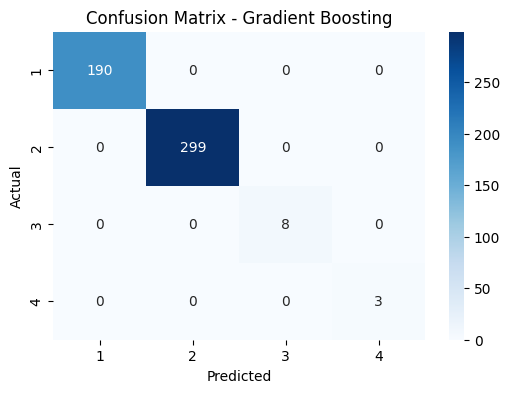


--- Bagging Classifier (Random Forest Base) ---
Akurasi: 1.0
Presisi: 1.0
Recall: 1.0
F1-Score: 1.0
AUC: 1.0


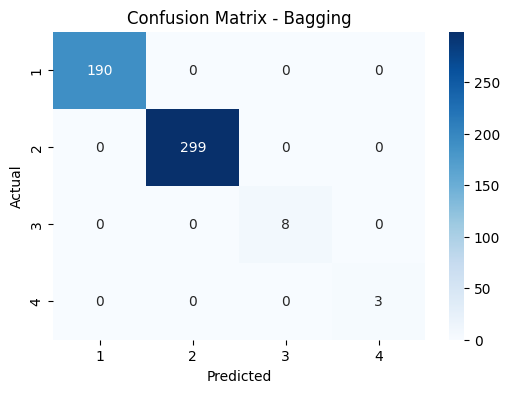


--- AdaBoost Classifier ---
Akurasi: 0.978
Presisi: 0.9624169381107491
Recall: 0.978
F1-Score: 0.970105610561056
AUC: 0.9935004853779881


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


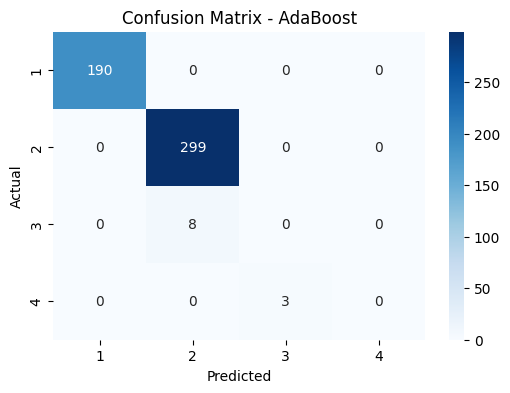


--- F1-Squared (Example calculation for Bagging) ---
F1-Squared for Bagging: 1.0


In [17]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Model Boosting (Gradient Boosting) ---
print("\n--- Gradient Boosting Classifier ---")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
y_proba_gb = gb_model.predict_proba(X_test_scaled) # Probabilitas untuk semua kelas

# Evaluasi Gradient Boosting
print("Akurasi:", accuracy_score(y_test, y_pred_gb))
print("Presisi:", precision_score(y_test, y_pred_gb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_gb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_gb, average='weighted'))
print("AUC:", roc_auc_score(y_test, y_proba_gb, multi_class='ovr'))

# Confusion Matrix Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- Model Bagging (Random Forest sebagai base estimator) ---
print("\n--- Bagging Classifier (Random Forest Base) ---")
rf_model_base = RandomForestClassifier(n_estimators=10, random_state=42) # Gunakan n_estimators kecil untuk base
bagging_model = BaggingClassifier(estimator=rf_model_base, n_estimators=10, random_state=42)
bagging_model.fit(X_scaled, y_train)
y_pred_bagging = bagging_model.predict(X_test_scaled)
y_proba_bagging = bagging_model.predict_proba(X_test_scaled) # Probabilitas untuk semua kelas

# Evaluasi Bagging
print("Akurasi:", accuracy_score(y_test, y_pred_bagging))
print("Presisi:", precision_score(y_test, y_pred_bagging, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_bagging, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_bagging, average='weighted'))
print("AUC:", roc_auc_score(y_test, y_proba_bagging, multi_class='ovr'))

# Confusion Matrix Bagging
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=bagging_model.classes_, yticklabels=bagging_model.classes_)
plt.title('Confusion Matrix - Bagging')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- Model Boosting (AdaBoost) ---
print("\n--- AdaBoost Classifier ---")
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_scaled, y_train)
y_pred_adaboost = adaboost_model.predict(X_test_scaled)
y_proba_adaboost = adaboost_model.predict_proba(X_test_scaled) # Probabilitas untuk semua kelas

# Evaluasi AdaBoost
print("Akurasi:", accuracy_score(y_test, y_pred_adaboost))
print("Presisi:", precision_score(y_test, y_pred_adaboost, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_adaboost, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_adaboost, average='weighted'))
print("AUC:", roc_auc_score(y_test, y_proba_adaboost, multi_class='ovr'))

# Confusion Matrix AdaBoost
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- Evaluasi F1-Squared ---
# Perlu diingat bahwa F1-Squared bukanlah metrik evaluasi standar.
# Biasanya yang digunakan adalah F1-Score.
# Jika Anda benar-benar membutuhkan F1-Squared, Anda bisa menghitungnya
# dengan mengkuadratkan nilai F1-Score.
print("\n--- F1-Squared (Example calculation for Bagging) ---")
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')
f1_squared_bagging = f1_bagging**2
print(f"F1-Squared for Bagging: {f1_squared_bagging}")